In [21]:
# importing the libraries
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical # similar to OHE
from tensorflow.keras.models import Sequential # sequential is model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fashionmnist' dataset.
Path to dataset files: /kaggle/input/fashionmnist


In [ ]:
import os

path = "/kaggle/input/fashionmnist"
os.listdir(path)


['t10k-labels-idx1-ubyte',
 't10k-images-idx3-ubyte',
 'fashion-mnist_test.csv',
 'fashion-mnist_train.csv',
 'train-labels-idx1-ubyte',
 'train-images-idx3-ubyte']

In [5]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "fashion-mnist_train.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "zalando-research/fashionmnist",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-251015765.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


Using Colab cache for faster access to the 'fashionmnist' dataset.
First 5 records:    label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0     

In [6]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
print(df)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995      9       0       0       0       0       0       0       0       0   
59996      1       0       0       0       0       0       0       0       0   
59997      8       0       0       0       0       0       0       0       0   
59998      8       0       0       0       0       0       0       0       0   
59999      7       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776 

In [11]:
y_train = df['label']
x_train = df.drop('label', axis=1)

# Assuming you would load the test data similarly into a 'test_df'
# For now, x_test and y_test are not defined here as 'test_df' isn't loaded in this notebook snippet.
# If you have 'test_df' loaded, you would do:
# y_test = test_df['label']
# x_test = test_df.drop('label', axis=1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)

x_train shape: (60000, 784)
y_train shape: (60000,)


In [17]:
x_train

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,5,0,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,1,2,0,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
y_train

,label
0,2
1,9
2,6
3,0
4,3
...,...
59995,9
59996,1
59997,8
59998,8


In [28]:
all_images = np.concatenate((x_train, x_test), axis=0)
all_labels = np.concatenate((y_train, y_test), axis=0)

print("all_images shape:", all_images.shape)
print("all_labels shape:", all_labels.shape)

all_images shape: (70000, 784)
all_labels shape: (70000,)


In [29]:
print("\nMatrix of first image:\n")
print(all_images[0])


Matrix of first image:

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   4   0
   0   0   0   0  62  61  21  29  23  51 136  61   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0  88 201 228 225 255 115  62
 137 255 235 222 255 135   0   0   0   0   0   0   0   0   0   0   0   0
   0  47 252 234 238 224 215 215 229 108 180 207 214 224 231 249 254  45
   0   0   0   0   0   0   0   0   1   0   0 214 222 210 213 224 225 217
 220 254 233 219 221 217 223 221 240 254   0   0   1   0   0   0   1   0
   0   0 128 237 207 224 224 207 216 214 210 208 211 221 208 219 213 226
 211 237 150   0   0   0   0   0   0   2   0   0 237 222 215 207 210 212
 213 206 214 213 214 213 2

0 → T-shirt / Top

1 → Trouser

2 → Pullover

3 → Dress

4 → Coat

5 → Sandal

6 → Shirt

7 → Sneaker

8 → Bag

9 → Ankle boot


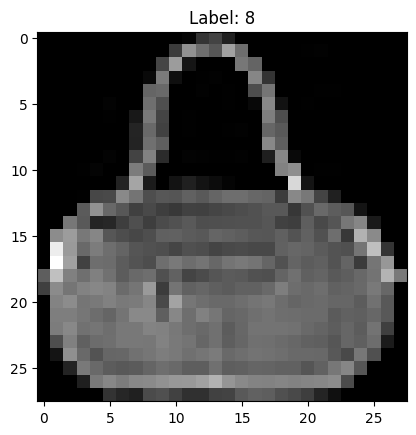

In [31]:
plt.imshow(all_images[20].reshape(28, 28), cmap="gray")
plt.title("Label: " + str(all_labels[20]))
plt.show()

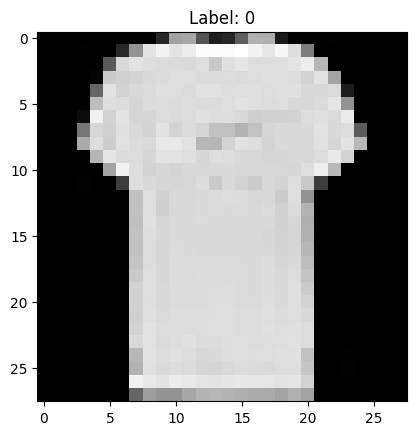

In [32]:
plt.imshow(all_images[10].reshape(28, 28), cmap="gray")
plt.title("Label: " + str(all_labels[10]))
plt.show()

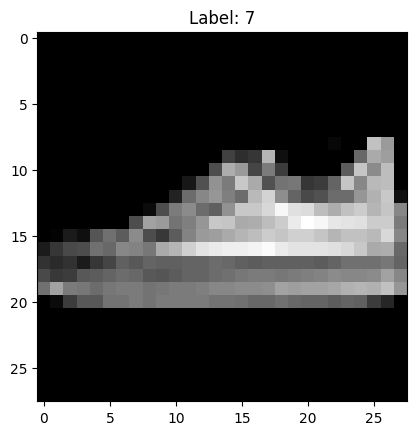

In [33]:
plt.imshow(all_images[21].reshape(28, 28), cmap="gray")
plt.title("Label: " + str(all_labels[21]))
plt.show()

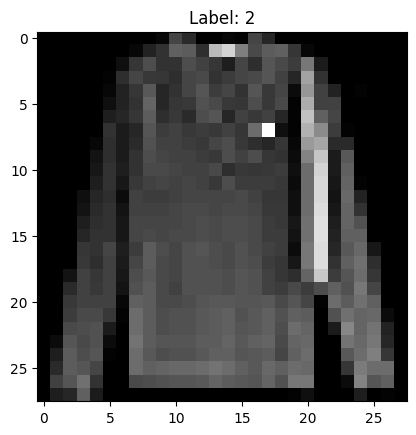

In [35]:
plt.imshow(all_images[78].reshape(28, 28), cmap="gray")
plt.title("Label: " + str(all_labels[78]))
plt.show()

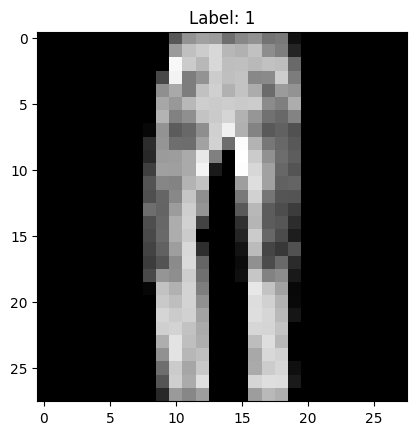

In [36]:
plt.imshow(all_images[109].reshape(28, 28), cmap="gray")
plt.title("Label: " + str(all_labels[109]))
plt.show()

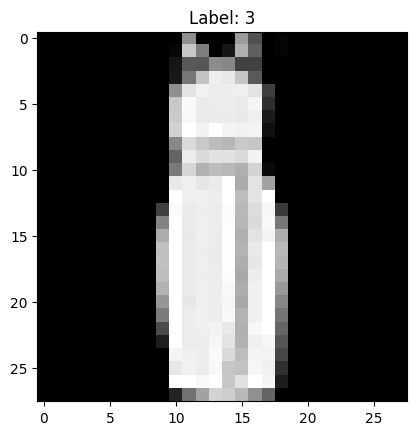

In [37]:
plt.imshow(all_images[99].reshape(28, 28), cmap="gray")
plt.title("Label: " + str(all_labels[99]))
plt.show()